# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
    Perform a weather check on each city using a series of successive API calls.
    Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
ncities = []
cloudiness = []
Country = []
date = []
Humidity = []
temp = []
Lat = []
lng = []
wind = []

In [5]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print(f'Processing record {record_counter} of set {set_counter} | {city}')
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        Lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        ncities.append(city)
    except:
        print("City not found. Skipping...")
        pass
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 2 of set 0 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 3 of set 0 | lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
City not found. Skipping...
Processing record 4 of set 0 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 5 of set 0 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 6 of set 0 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 7 of set 0 | upernavik


Processing record 7 of set 1 | umm durman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
City not found. Skipping...
Processing record 8 of set 1 | husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 9 of set 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 10 of set 1 | hurghada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 11 of set 1 | coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 12 of set 1 | agadir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 13 of set 1 | muqui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebc

Processing record 13 of set 2 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 14 of set 2 | beni mazar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 15 of set 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 16 of set 2 | hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 17 of set 2 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 18 of set 2 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 19 of set 2 | meridian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe


Processing record 21 of set 3 | acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 22 of set 3 | broken hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 23 of set 3 | chitrakonda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 24 of set 3 | sinop
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 25 of set 3 | huinan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 26 of set 3 | xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 27 of set 3 | cam pha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
City not

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 27 of set 4 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
City not found. Skipping...
Processing record 28 of set 4 | sumbawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
City not found. Skipping...
Processing record 29 of set 4 | katima mulilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 30 of set 4 | rapid city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 31 of set 4 | salinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 32 of set 4 | kawambwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fb

Processing record 33 of set 5 | mgachi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 34 of set 5 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
City not found. Skipping...
Processing record 35 of set 5 | mae hong son
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 36 of set 5 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 37 of set 5 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 38 of set 5 | bridlington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 39 of set 5 | san ramon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing record 39 of set 6 | krasnozerskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 40 of set 6 | teguldet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 41 of set 6 | belin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 42 of set 6 | artyom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 43 of set 6 | sao geraldo do araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 44 of set 6 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 45 of set 6 | wulanhaote
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b8

Processing record 46 of set 7 | shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 47 of set 7 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 48 of set 7 | parvatsar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 49 of set 7 | kuche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
City not found. Skipping...
Processing record 50 of set 7 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 0 of set 8 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 1 of set 8 | rancho palos verdes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b

Processing record 2 of set 9 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
City not found. Skipping...
Processing record 3 of set 9 | ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 4 of set 9 | udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 5 of set 9 | issoire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 6 of set 9 | pozo colorado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 7 of set 9 | moengo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 8 of set 9 | kachiry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa31

Processing record 8 of set 10 | bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 9 of set 10 | kon tum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 10 of set 10 | sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 11 of set 10 | yefira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
City not found. Skipping...
Processing record 12 of set 10 | malanje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 13 of set 10 | lagos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 14 of set 10 | sarakhs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebc

Processing record 14 of set 11 | hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 15 of set 11 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 16 of set 11 | binche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 17 of set 11 | estevan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 18 of set 11 | mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 19 of set 11 | cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06abbe
Processing record 20 of set 11 | puerto lempira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=72b3f05fa310fbdebca3b8b87b06a

### Convert Raw Data to DataFrame. 
     Export the city data into a .csv.
     Display the DataFrame

In [6]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dictionary = {
    "City": ncities,
    "Cloudiness (%)" : cloudiness,
    "Country" : Country,
    "Date" : date,
    "Humidity (%)" : Humidity,
    "Lat" : Lat,
    "Lng" : lng,  
    "Max Temperature (F)": temp,
    "Wind Speed (mph)" : wind
}
weather_df = pd.DataFrame(weather_dictionary)
weather_df.count()

City                   560
Cloudiness (%)         560
Country                560
Date                   560
Humidity (%)           560
Lat                    560
Lng                    560
Max Temperature (F)    560
Wind Speed (mph)       560
dtype: int64

In [7]:
weather_df.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Lat,Lng,Max Temperature (F),Wind Speed (mph)
0,fairbanks,1,US,1588375226,29,64.84,-147.72,51.01,4.70
1,souillac,20,MU,1588375226,73,-20.52,57.52,75.20,9.17
2,busselton,44,AU,1588375227,41,-33.65,115.33,51.01,10.16
3,punta arenas,75,CL,1588375227,76,-53.15,-70.92,48.20,17.22
4,bambous virieux,20,MU,1588375227,73,-20.34,57.76,75.20,9.17


In [8]:
# Export the city data into a .csv.
# Set variable for output file
output_file = os.path.join('..','output_data', 'cities.csv')
# Open the output file
with open(output_file, 'w') as datafile:
    weather_df.to_csv(output_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

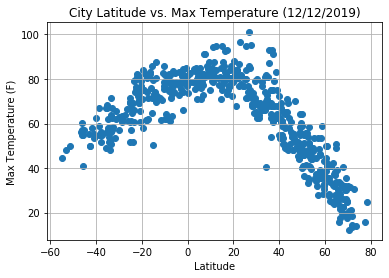

In [9]:
x_values =weather_df["Lat"] 
y_values =weather_df["Max Temperature (F)"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (12/12/2019)")
plt.grid()
# Show Plot and save as .png
plt.show
plt.savefig("../Images/Lat_Temperature.png")

#### Latitude vs. Humidity Plot

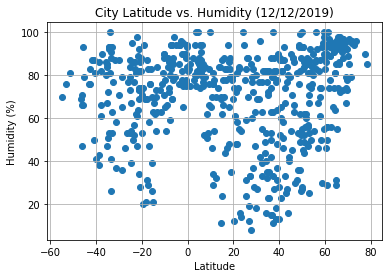

In [10]:
x_values =weather_df["Lat"] 
y_values =weather_df["Humidity (%)"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (12/12/2019)")
plt.grid()
# Show Plot and save as .png
plt.show
plt.savefig("../Images/Lat_Humidity.png")

#### Latitude vs. Cloudiness Plot

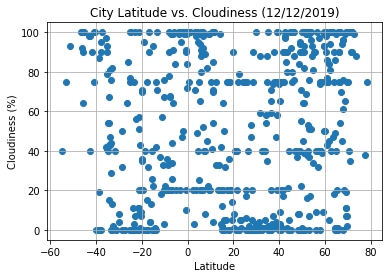

In [11]:
x_values =weather_df["Lat"] 
y_values =weather_df["Cloudiness (%)"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (12/12/2019)")
plt.grid()
# Show Plot and save as .png
plt.show
plt.savefig("../Images/Lat_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

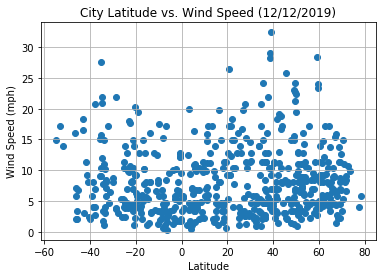

In [12]:
x_values =weather_df["Lat"] 
y_values =weather_df["Wind Speed (mph)"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (12/12/2019)")
plt.grid()
# Show Plot and save as .png
plt.show
plt.savefig("../Images/Lat_Wind_Speed.png")

## Linear Regression

In [22]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = weather_df[weather_df["Lng"]>0]
southern_df = weather_df[weather_df["Lng"]<0]
southern_df.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Lat,Lng,Max Temperature (F),Wind Speed (mph)
0,fairbanks,1,US,1588375226,29,64.84,-147.72,51.01,4.70
3,punta arenas,75,CL,1588375227,76,-53.15,-70.92,48.20,17.22
5,upernavik,99,GL,1588375227,94,72.79,-56.15,30.78,10.69
8,vicksburg,1,US,1588375034,39,32.35,-90.88,78.80,5.82
9,clyde river,40,CA,1588375227,85,70.47,-68.59,12.20,14.99


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Here is the regression line y = -0.35x +67.06


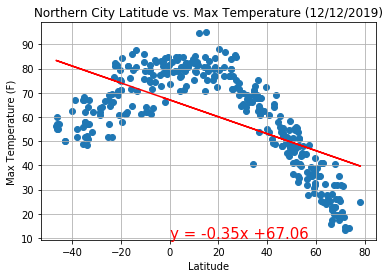

In [14]:
# Perform a linear regression on Max Temperature vs. Latitude
x_values =northern_df["Lat"] 
y_values =northern_df["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

# Scatter plot and regression line
plt.scatter(x_values,y_values)

plt.plot(x_values,regression_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern City Latitude vs. Max Temperature (12/12/2019)")
plt.grid()

# Create regression line equation string,  
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Here is the regression line {line_eq}")
plt.annotate(line_eq,(.2,10),fontsize=15,color="red")
# Show Plot and save as .png
plt.show
plt.savefig("../Images/Nothern_Lat_Temperature.png")

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Here is the regression line y = -0.24x +69.97


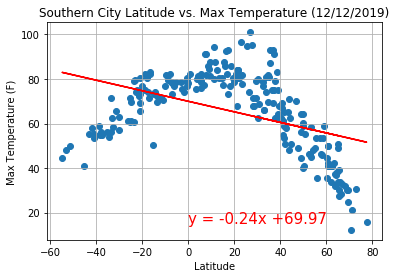

In [15]:
# Perform a linear regression on Max Temperature vs. Latitude
x_values =southern_df["Lat"] 
y_values =southern_df["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

# Scatter plot and regression line
plt.scatter(x_values,y_values)

plt.plot(x_values,regression_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern City Latitude vs. Max Temperature (12/12/2019)")
plt.grid()

# Create regression line equation string,  
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Here is the regression line {line_eq}")
plt.annotate(line_eq,(-.25,15),fontsize=15,color="red")
# Show Plot and save as .png
plt.show
plt.savefig("../Images/southern_Lat_Temperature.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Here is the regression line y = 0.11x +69.84


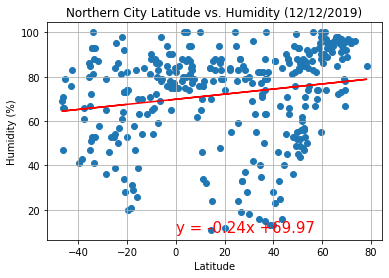

In [16]:
# Perform a linear regression on Humidity vs. Latitude
x_values =northern_df["Lat"] 
y_values =northern_df["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

# Scatter plot and regression line
plt.scatter(x_values,y_values)

plt.plot(x_values,regression_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern City Latitude vs. Humidity (12/12/2019)")
plt.grid()
plt.annotate(line_eq,(.2,10),fontsize=15,color="red")
# Create regression line equation string,  
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Here is the regression line {line_eq}")

# Show Plot and save as .png
plt.show
plt.savefig("../Images/Nothern_Lat_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Here is the regression line y = -0.13x +69.82


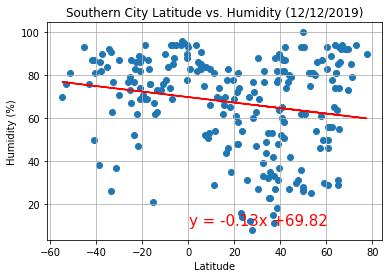

In [17]:
# Perform a linear regression on Humidity vs. Latitude
x_values =southern_df["Lat"] 
y_values =southern_df["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

# Scatter plot and regression line
plt.scatter(x_values,y_values)

plt.plot(x_values,regression_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern City Latitude vs. Humidity (12/12/2019)")
plt.grid()

# Create regression line equation string,  
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Here is the regression line {line_eq}")
plt.annotate(line_eq,(.2,10),fontsize=15,color="red")
# Show Plot and save as .png
plt.show
plt.savefig("../Images/southern_Lat_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Here is the regression line y = 0.12x +49.74


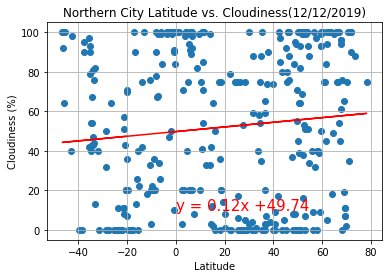

In [18]:
# Perform a linear regression on Cloudiness  vs. Latitude
x_values =northern_df["Lat"] 
y_values =northern_df["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

# Scatter plot and regression line
plt.scatter(x_values,y_values)

plt.plot(x_values,regression_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern City Latitude vs. Cloudiness(12/12/2019)")
plt.grid()

# Create regression line equation string,  
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Here is the regression line {line_eq}")
plt.annotate(line_eq,(.2,10),fontsize=15,color="red")
# Show Plot and save as .png
plt.show
plt.savefig("../Images/Nothern_Lat_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Here is the regression line y = 0.05x +45.19


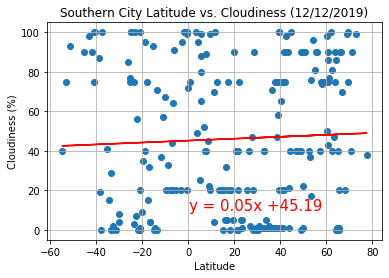

In [19]:
# Perform a linear regression on Cloudiness (%) vs. Latitude
x_values =southern_df["Lat"] 
y_values =southern_df["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

# Scatter plot and regression line
plt.scatter(x_values,y_values)

plt.plot(x_values,regression_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern City Latitude vs. Cloudiness (12/12/2019)")
plt.grid()

# Create regression line equation string,  
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Here is the regression line {line_eq}")
plt.annotate(line_eq,(.2,10),fontsize=15,color="red")
# Show Plot and save as .png
plt.show
plt.savefig("../Images/southern_Lat_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Here is the regression line y = -0.0x +7.36


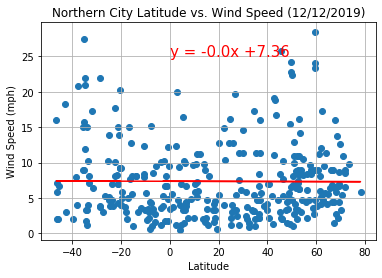

In [20]:
# Perform a linear regression on Wind Speed  vs. Latitude
x_values =northern_df["Lat"] 
y_values =northern_df["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

# Scatter plot and regression line
plt.scatter(x_values,y_values)

plt.plot(x_values,regression_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern City Latitude vs. Wind Speed (12/12/2019)")
plt.grid()

# Create regression line equation string,  
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Here is the regression line {line_eq}")
plt.annotate(line_eq,(.2,25),fontsize=15,color="red")
# Show Plot and save as .png
plt.show
plt.savefig("../Images/Nothern_Lat_Wind_Speed .png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Here is the regression line y = 0.02x +8.96


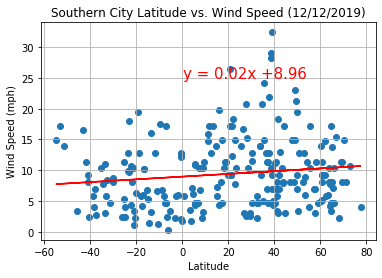

In [21]:
# Perform a linear regression on Wind Speed (mph) vs. Latitude
x_values =southern_df["Lat"] 
y_values =southern_df["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

# Scatter plot and regression line
plt.scatter(x_values,y_values)

plt.plot(x_values,regression_values, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern City Latitude vs. Wind Speed (12/12/2019)")
plt.grid()

# Create regression line equation string,  
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Here is the regression line {line_eq}")
plt.annotate(line_eq,(.2,25),fontsize=15,color="red")
# Show Plot and save as .png
plt.show
plt.savefig("../Images/southern_Lat_Wind_Speed.png")